# Assignment 4

**Deadline**:  02/10/2019, 9.59am

**Names and student numbers:**
1. Vien Dinh (11002115)
2. Dante van der Heijden (11020075)
3. Jorrim Prins (11038934)

**Declaration of Originality**

We whose names are given under 1., 2. and 3. above declare that:
1. These solutions are solely our own work.
2. We have not made (part of) these solutions available to any other student.

## Instructions for completing and submitting the assignment
Please pay attention to the following instructions:
1. Please follow carefully the steps outlined in the assignment. If you cannot solve an exercise and this hinders continuing with subsequent exercises, try to find a way to work around it and give a clear explanation for the solution you have chosen.
2. Submit your work in the form of a Jupyter notebook via Canvas, before the deadline. Your notebook should not give errors when executed with `Run All`.
4. You are allowed to work on the assignment in groups of 2 or 3 students and to submit together. Before you submit, you and your team members have to register as an **Assignment group** on Canvas. Only a single member of each group has to submit the notebook. Please do **NOT** submit the same notebook multiple times!
5. Please write your names also inside this markdown cell, under **Names and student numbers**.

**Exercise:** import the relevant libraries.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Instructions
In this assignment you have to develop a regression model. You will be given a training set of 18 datapoints. Using the techniques presented in this course, we ask you to come up with a model that has the best generalization performance. This performance will be assessed on a test dataset of 25,000 datapoints, which is not available to you. The assignment is also a competition: your mark depends (partly) on how well your model does compared to those of other groups and the three groups with the best performing model will be highlighted in class.

### The data
The training data can be found in the file “training_data.csv” on Canvas. It consists of a two-dimensional comma-separated matrix of 18 rows and 13 columns. Each row is a datapoint, consisting of 12 input variables and 1 target variable. The target variable is the last column of the matrix.

### Submitting your work
Your work in this Jupyter notebook consists of two parts. **Part 1** is used to train, create and evaluate your best performing model. In the first cell, you have to train your best performing model on the training data. The code to load the training data is already given. Furthermore, in that same cell you have to create a function called `best_model`. This function has a single input argument, which is a 2-dimensional NumPy array with an arbitrary number of rows and 12 columns (e.g. the input features `X` of the training data). The function should return a 1-dimensional array with the predictions of your best model for the datapoints in the input argument. Hence, the number of elements in this 1-dimensional array should be equal to the number of rows of the 2-dimensional array used as input argument.

In the second cell, we are using a testset called `test_data.csv` of 25,000 datapoints to assess the generalization performance of your function `best_model`. Of course, the testset is only available to the teachers. The code in the second cell may not be changed!!! It will be used by the teachers to compute the generalization performance of your best model. On Canvas, you can find a file called `FAKE_test_data.csv`. This is a 2-dimensional array of completely random numbers (fake data), having the same dimensions as the dataset in `test_data.csv`. If you put this file in the same folder as this Jupyter notebook, you can test whether your function `best_model` is defined correctly by checking if the second cell runs without errors. Since the numbers in `FAKE_test_data.csv` are fake data, they **cannot** be used to estimate the performance of your `best_model`. **AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE FIRST CELL, THE SECOND CELL SHOULD RUN WITHOUT ERRORS!!!** If this is not the case, your work will **not** be marked. 

In **Part 2** of the notebook, you will present your analysis of the regression problem and the steps you have taken to arrive at your best model. Here, you have to explain and perform all the methods that you have used to identify your best model. As in all exercises, please make sure all steps are well motivated and presented in a clear and structured manner. We recommend using visualization methods (e.g., plots with matplotlib), if applicable, to clarify your work.

### Examples
On Canvas, you can find two example notebooks (“DSM_assignment4_example_with_sklearn.ipynb”, “DSM_assignment4_example_without_sklearn.ipynb”). These notebooks contain examples of how you can submit **Part 1** of the assignment. As "best model" in the examples, we have **arbitrarily** chosen for a regression model using the third power of the 7-th principal component. In one of the files we use scikit-learn, whereas in the other one we train the same model without using scikit-learn. Please look carefully at how the function `best_model` is created and make sure you understand all steps.

### Allowed methods
Any of the methods discussed in the first 4 weeks of the course may be used. You are also free to use generalizations of these methods, as long as the models you are using fall in the class of linear models (i.e., linear in the parameters). If you doubt whether your method is allowed, please consult with the teachers. 

Furthermore, you are allowed to use libraries like scikit-learn, but you are not required to use them.

### The competition
The generalization performance of your best model is assessed by the **mean absolute error (MAE)** on a secret test dataset consisting of 25,000 independent and identically distributed datapoints. They were created with the same data-generating process as the data of the training set of 18 datapoints. The scores will be ranked and the top-three groups and their scores will be announced in class.

### The marking
As can be seen in the rubric on Canvas, 20% of your mark will depend on the generalization performance of your best model, compared to the best models of your peers.

# Part 1: training, creating and evaluating your best model

In [2]:
#####################################################
# USE THIS CELL TO TRAIN AND CREATE YOUR BEST MODEL # 
#####################################################

# loading the training data
training_data = np.genfromtxt("training_data.csv", delimiter=',')
X = training_data[:,:-1]
y = training_data[:,-1]

def polynomial_features(x_training, M):
        return np.concatenate(tuple([x_training**(n+1) for n in range(M+1)]), axis=1)

pca = PCA()
pca.fit(X)
Z = pca.transform(X)
features = polynomial_features(Z[:,:4], 2)

model = Lasso(alpha=0.1)
model.fit(features, y)

# creating the predictive function best_model()
def best_model(X_new):
    
    Z_new = pca.transform(X_new)    # projecting new observations on principal components directions
    features_new = polynomial_features(Z_new[:,:4], 2) # selecting the feature(s) used in the model
    predictions = model.predict(features_new)          # making predictions
    
    return predictions

In [3]:
######################################################
#    !!!DO NOT CHANGE THE CODE IN THIS CELL!!!       #
# THIS CELL IS USED FOR EVALUATING YOUR BEST MODEL.  #  
# AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE #
# PREVIOUS CELL, THIS CELL SHOULD RUN WITHOUT ERRORS # 
######################################################

# Determining which test data will be used. If real test 
# data is available, it will be used. Otherwise, the 
# fake test data will be used.
if os.path.exists("test_data.csv"):
    test_data_filename = "test_data.csv"
elif os.path.exists("FAKE_test_data.csv"):
    test_data_filename = "FAKE_test_data.csv"
else:
    test_data_filename = None
    print("ERROR: Test data is missing!")
    
if test_data_filename:

    # loading the test data    
    test_data = np.genfromtxt(test_data_filename, delimiter=',')
    X_test = test_data[:,:-1]
    y_test = test_data[:,-1]

    # making predictions and computing the mean absolute error (MAE)
    predictions = best_model(X_test)
    MAE = np.mean(np.abs(predictions - y_test))

    print("The mean absolute error is: ", MAE)

The mean absolute error is:  1.5743135544437639


# Part 2: analysis 

## Introduction
For this assignment we are asked to find an optimal model given a trainingset of 18 data points, consisting of 12 input variables and 1 target variable. To do this, we utilized the methods discussed during the first four weeks of the Data Science Methods course taught at the University of Amsterdam. First, we will investigate reducing the dimension of the feature space using Principle Component Analysis. Having derrived principle components and selecting only the relevant ones, we've compared regression methods of Linear, Ridge and Lasso with different polynomial features in our explanatory variables and found an optimal model.

## Analysis

### Principle Component Analysis
First, we will use the Scikit Learn's PCA function from the Decomposition module to find the principle components and see which amount for the variance in the input variables

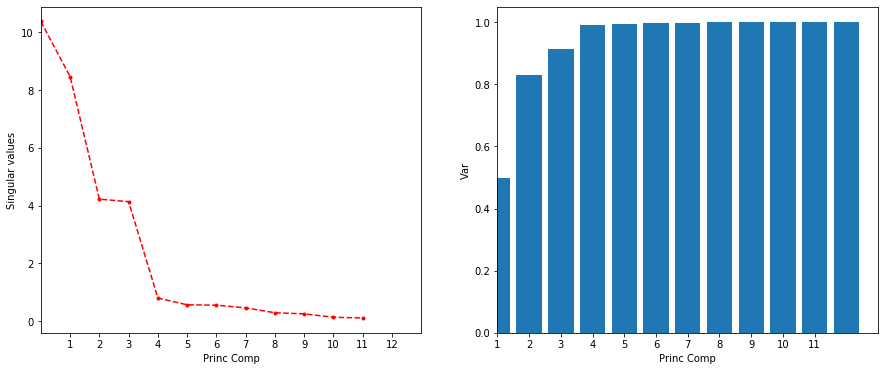

In [4]:
pca = PCA()
pca.fit(X)

A = pca.explained_variance_ratio_
B = pca.singular_values_

Z = pca.transform(X)

fig1 = plt.figure(6, figsize=(15,6))
ax1 = fig1.add_subplot(1,2,1)

ax1.plot(range(Z.shape[1]), B, marker='.', ls='--', color='r')
ax1.set_xlim([0,X.shape[1]+1])
ax1.set_xlabel('Princ Comp')
ax1.set_ylabel('Singular values')
ax1.set_xticks(np.arange(1,X.shape[1]+1,step=1));

# Vector with cumulative values of the variance
var_explained = A
var_explained_sum = np.cumsum(var_explained)

x_range = list(range(1,len(var_explained_sum)+1))
ax2 = fig1.add_subplot(1,2,2)

ax2.bar(x_range, var_explained_sum)
ax2.set_xlim(Z.shape[1])
ax2.set_xlabel('Princ Comp')
ax2.set_ylabel('Var')
ax2.set_xticks(np.arange(1,X.shape[1],step=1));

Using the scree-plot in the first figure, we can see that a plateau starts at the 5th principal component (or, judging from the second graph, the explained variance stops increasing at 5th principal component). For this reason, we will discard the principle components after the fourth one. Judging from the covariance matrix of X, one could also prove that 4 columns remain when we want to solve the multicollinearity problem.

### Model Selection
Continuing our analysis with only the first 4 principle components, we are left with a choice between Linear Regression, Ridge Regression and Lasso Regression. These models have been trained on data with different values of M (Degree of the polynomial). We're going to compare all models using the Mean Absolute Error as a compartive value. To calculate the MAE, we use K-Fold Cross Validation. Here, we select K to be equal to 5 because (from the usually standard values for K) higher values would go close to LOOCV. The Linear Regression will give one specific value for the MAE, while for both Ridge and Lasso Regression, we can compare models using various values of the penalty term $\lambda$. 
We start with the Linear Regression Model.


In [5]:
### Creating polynomial data structure
i = 4 # Amount of Variables
M = 2 # Degree of Polynomial

def polynomial_features(x_training, M):
        return np.concatenate(tuple([x_training**(n+1) for n in range(M+1)]), axis=1)

Z_pol = polynomial_features(Z[:,:i], M)

#### Linear Regression

In [6]:
K = 5
cv_folds = KFold(n_splits=K, shuffle=True)  #, random_state=10)

lg = LinearRegression()
lg.fit(Z_pol, y)
lg_parameters = lg.coef_
lg_intercept = lg.intercept_
lg_MAE_folds = -cross_val_score(lg, Z_pol, y, cv=cv_folds, scoring='neg_mean_absolute_error')
lg_MAE = np.full(40,np.mean(lg_MAE_folds)) # Make list of 40 MAE values so you can plot it in
lg_MAE_std = np.full(40,np.std(lg_MAE_folds, ddof=1)/np.sqrt(K)) # the same graph as the Lasso and Ridge MAEs

#### Ridge and Lasso Regression
Continuing with a model that includes penality term for large values of the parameters, we have to determine the optimal value of $\lambda$ for both the Ridge and the Lasso regression. First we investigate the outcomes of all three models, for different values of $\lambda$.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00941170884534026, tolerance: 0.005986254511381694
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016716734506331314, tolerance: 0.006556193633679262
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010656536331420163, tolerance: 0.00687498383837036
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

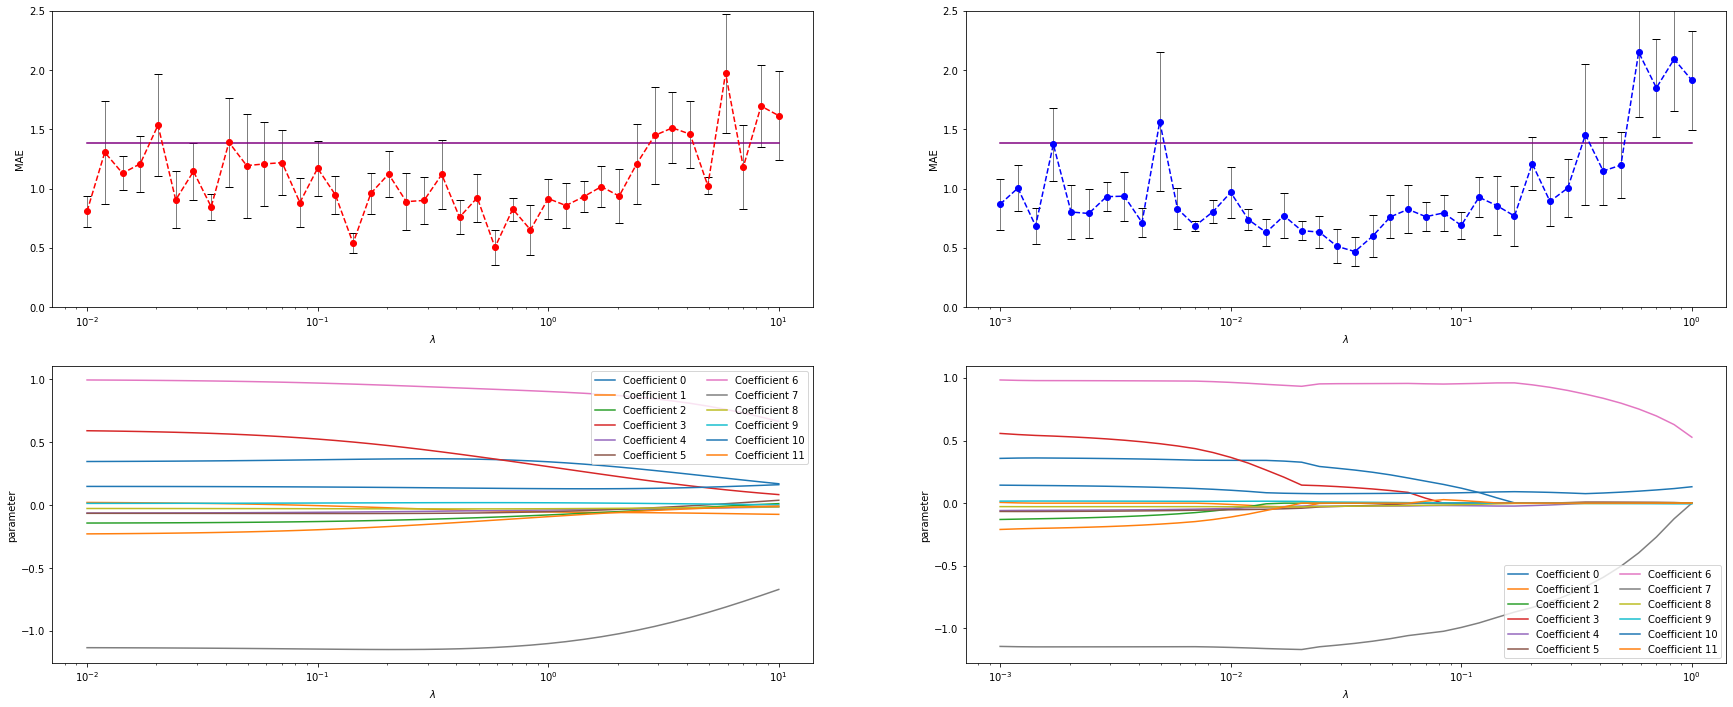

In [7]:
no_lambs = 40
lambs_ridge = np.logspace(-2,1, no_lambs) 
lambs_lasso = np.logspace(-3,0, no_lambs)

ridge_MAEs = []
ridge_MAE_stds = []
ridge_parameters = []
ridge_intercepts = []

lasso_MAEs = []
lasso_MAE_stds = []
lasso_parameters = []
lasso_intercepts = []

# Note that we are fitting the model for each value of lambda twice (in `cross_val_score` and `fit`). 
# To circumvent this inefficiency, one can manually implement cross-validation instead of using 
# `cross_val_score`.
for lamb in lambs_ridge:
    ridge = Ridge(alpha = lamb)
    
    ridge_MAE_folds = -cross_val_score(ridge, Z_pol, y, cv=cv_folds, scoring='neg_mean_absolute_error')
    ridge_MAEs.append(np.mean(ridge_MAE_folds))
    ridge_MAE_stds.append(np.std(ridge_MAE_folds, ddof=1)/np.sqrt(K)) 
    
    ridge.fit(Z_pol, y)
    ridge_parameters.append(list(ridge.coef_))
    ridge_intercepts.append(ridge.intercept_)
    
# Convert used lists to NumPy ndarrays
ridge_parameters = np.array(ridge_parameters)
ridge_intercepts = np.array(ridge_intercepts)


for lamb in lambs_lasso:
    lasso = Lasso(alpha = lamb)
    
    lasso_MAE_folds = -cross_val_score(lasso, Z_pol, y, cv=cv_folds, scoring='neg_mean_absolute_error')
    lasso_MAEs.append(np.mean(lasso_MAE_folds))
    lasso_MAE_stds.append(np.std(lasso_MAE_folds, ddof=1)/np.sqrt(K)) 
    
    lasso.fit(Z_pol, y)
    lasso_parameters.append(list(lasso.coef_))
    lasso_intercepts.append(lasso.intercept_)
    
# Convert used lists to NumPy ndarrays
lasso_parameters = np.array(lasso_parameters)
lasso_intercepts = np.array(lasso_intercepts)

fig = plt.figure(9, figsize=(30,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3, sharex=ax1)
ax4 = fig.add_subplot(2,2,4, sharex=ax2)


ax1.errorbar(lambs_ridge, ridge_MAEs, yerr=ridge_MAE_stds, capsize=4, fmt='ro--', ecolor='black', elinewidth=0.5)
ax2.errorbar(lambs_lasso, lasso_MAEs, yerr=lasso_MAE_stds, capsize=4, fmt='bo--', ecolor='black', elinewidth=0.5)

# Plot linear regression lines
ax1.plot(lambs_ridge, lg_MAE, color='purple')
ax2.plot(lambs_lasso, lg_MAE, color='purple')


ax1.set_xscale("log")
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel('MAE');
ax1.set_ylim(bottom=0,top=2.5)

ax2.set_xscale("log")
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel('MAE');
ax2.set_ylim(bottom=0,top=2.5)


for i in range(Z_pol.shape[1]):
    ax3.plot(lambs_ridge, ridge_parameters[:,i], label = "Coefficient "+str(i) )
    ax4.plot(lambs_lasso, lasso_parameters[:,i], label = "Coefficient "+str(i))
ax3.set_xlabel(r'$\lambda$')
ax3.set_ylabel('parameter')
ax3.legend(ncol=2);
ax4.set_xlabel(r'$\lambda$')
ax4.set_ylabel('parameter')
ax4.legend(ncol=2);

To obtain  the optimal value of $\lambda$, we use an algorithm that takes the largest $\lambda$ whose MAE is at most one standard error away from the minimum MAE.

In [8]:
min_ridge_MAE = min(ridge_MAEs)
min_lasso_MAE = min(lasso_MAEs)

i = ridge_MAEs.index(min_ridge_MAE)
one_std_rule = [ridge_MAEs[i] - np.mean(ridge_MAE_stds), ridge_MAEs[i] + np.mean(ridge_MAE_stds)]

ridge_optim_index = 0

# Determining the optimal lambda according to the one-standard-error rule.
for j in range(i, len(ridge_MAEs)):
    if (ridge_MAEs[j] > one_std_rule[0] and ridge_MAEs[j] < one_std_rule[1]):
        ridge_optim_index = j
    else:
        continue

ridge_lambda_min = lambs_ridge[ridge_optim_index]
ridge_MAE_min = ridge_MAEs[ridge_optim_index]
ridge_std_min = ridge_MAE_stds[ridge_optim_index]
ridge_param_min = ridge_parameters[ridge_optim_index]
ridge_intercepts_min = ridge_intercepts[ridge_optim_index]

# Now repeat for lasso
i = lasso_MAEs.index(min_lasso_MAE)
one_std_rule = [lasso_MAEs[i] - np.mean(lasso_MAE_stds), lasso_MAEs[i] + np.mean(lasso_MAE_stds)]

lasso_optim_index = 0

# Determining the optimal lambda according to the one-standard-error rule.
for j in range(i, len(lasso_MAEs)):
    if (lasso_MAEs[j] > one_std_rule[0] and lasso_MAEs[j] < one_std_rule[1]):
        lasso_optim_index = j
    else:
        continue

lasso_lambda_min = lambs_lasso[lasso_optim_index]
lasso_MAE_min = lasso_MAEs[lasso_optim_index]
lasso_std_min = lasso_MAE_stds[lasso_optim_index]
lasso_param_min = lasso_parameters[lasso_optim_index]
lasso_intercepts_min = lasso_intercepts[lasso_optim_index]

lg = LinearRegression()
lg.fit(Z_pol, y)
lg_parameters = lg.coef_
lg_intercept = lg.intercept_
lg_MAE_folds = -cross_val_score(lg, Z_pol, y, cv=cv_folds, scoring='neg_mean_absolute_error')
lg_MAE = np.full(40,np.mean(lg_MAE_folds)) #Make list of 40 values so you can plot it with lasso en ridge MAE
lg_MAE_std = np.full(40,np.std(lg_MAE_folds, ddof=1)/np.sqrt(K))


lr_column = np.array([lg_MAE[0], lg_MAE_std[0], '-', lg_intercept, lg_parameters])
ridge_column = np.array([min_ridge_MAE, ridge_std_min, ridge_lambda_min, ridge_intercepts_min, ridge_param_min])
lasso_column = np.array([min_lasso_MAE, lasso_std_min, lasso_lambda_min, lasso_intercepts_min, lasso_param_min])

Summerizing our results, we obtain the following results

In [9]:
pd.DataFrame({'Linear Regression':lr_column,'Ridge Regression':ridge_column,'Lasso Regression':lasso_column}, index=["MAE",'std of MAE',"optimal lambda","intercept","parameters"])

,Linear Regression,Ridge Regression,Lasso Regression
MAE,2.01848,0.504504,0.46923
std of MAE,1.37812,0.211136,0.11239
optimal lambda,-,0.837678,0.1
intercept,0.652815,0.555338,0.0930702
parameters,"[0.34491115892310026, 0.025324941922461628, -0...","[0.3523234095533221, -0.0518471064993278, -0.0...","[0.11957150492243862, 0.0, 0.0, 0.0, -0.020036..."


### Conclusion
We estimated three models on a test set of 18 observations using features which were derrived from 12 input variables. The used features were "cleaned" through PCA, where only the first 4 principle components were used. Afterwards, models were estimated using Linear Regression and Ridge & Lasso Regression with varying values of $\lambda$. We deterimened the optimal value of $\lambda$ for both the Ridge and the Lasso Regression model, and compared the MAE of the Linear Regression, Ridge Regression and Lasso Regression model. Doing so, and choosing the minimum of these values, we conclude that the best model is the Lasso Regression model, with an optimal lambda of 0.170125, and an MAE of 0.561847. 

In [11]:
np.sum([0.170125,0.124817,0.0930702,0.1,0.14251,0.0837678,0.0701704,0.119378,0.203092,0.242446,0.0587802,0.0492388])/12

0.12144961666666665